# Nobel Prize Analysis
Since 1901, the Nobel Prize has stood as one of the world's most prestigious awards. Annually, it honors achievements in chemistry, literature, physics, physiology or medicine, economics, and peace. Besides the honor, prestige, and significant prize money, recipients are awarded a gold medal featuring the likeness of Alfred Nobel (1833 - 1896), the prize's founder.

The Nobel Foundation has made a dataset available of all prize winners from the awards from 1901 to 2016. The dataset used in this project is from the Nobel Prize API and you can get the 'nobel.csv' file in the 'data' folder.

Firstly, load the libraries and briefly look on the dataset.

In [ ]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# read the csv file. SOME DEVICES WILL HAVE DIFFERENT METHODS OF READING CSV FILE.
df = pd.read_csv('...\data\nobel.csv')
df.head()


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


There are some questions can be found from the dataset.
### 1. Find the most commonly awarded gender and birth country.

In [23]:
# Question 1: find the most commonly awarded gender and birth country
top_gender = df['sex'].value_counts().index[0]  
top_country = df['birth_country'].value_counts().index[0]
print("the most commonly awarded gender is: ",top_gender,"\n")
print("the most commonly awarded birth country is: ",top_country)

the most commonly awarded gender is:  Male 

the most commonly awarded birth country is:  United States of America


### 2. Find the decade which had the highest ratio of US-born Nobel Prize 

    decade  US-born_winner
0     1900        0.017544
1     1910        0.075000
2     1920        0.074074
3     1930        0.250000
4     1940        0.302326
5     1950        0.291667
6     1960        0.265823
7     1970        0.317308
8     1980        0.319588
9     1990        0.403846
10    2000        0.422764
11    2010        0.292683


c:\Users\ooipo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ooipo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


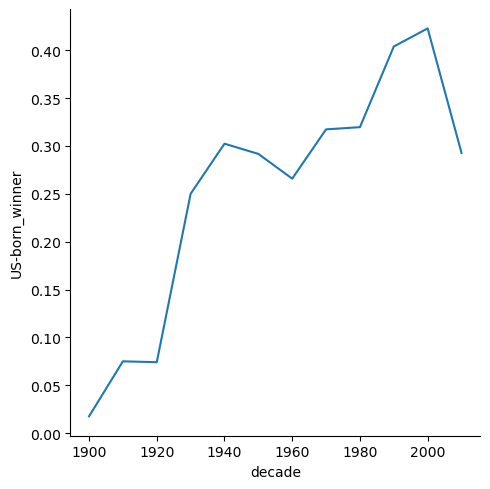

In [24]:
df['US-born_winner'] = df['birth_country']=='United States of America'
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)
prop_usa_winners = df.groupby('decade', as_index=False)['US-born_winner'].mean()
print(prop_usa_winners)
max_decade_usa = prop_usa_winners[prop_usa_winners['US-born_winner']==prop_usa_winners['US-born_winner'].max()]['decade'].values[0]
ax1 = sns.relplot(x='decade', y='US-born_winner', data=prop_usa_winners, kind="line")

From the output of the code, we know that 'prop_usa_winners' shows the ratio of USA winners in each decade, and the maximum ratio of Us-born_winner is in 2000. The line graph shows that time does have positive relationship with the ratio of US-born_winner. So we can assume there will be some factors that may impact the increasing number of nobel prize winners by the time increases.

### 3. To find when is the first woman to receive a nobel prize and in what category

The decade had the highest ratio of female laureates: 2010, in "Peace"


c:\Users\ooipo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ooipo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


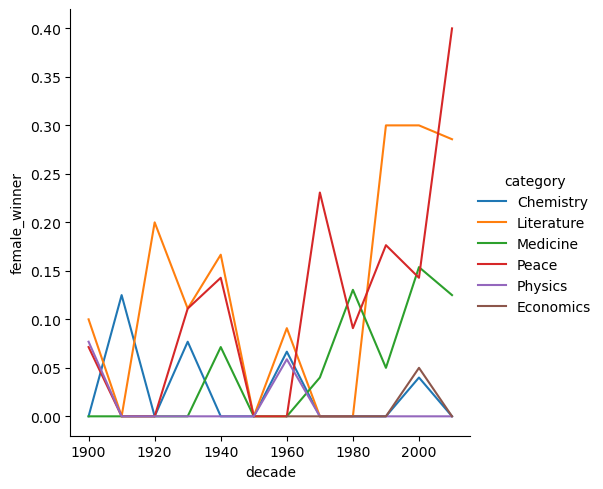

In [25]:
# create a column for female winners
df['female_winner'] = df['sex'] == 'Female'

# group by the information we want to extract from the data
prop_female_winners = df.groupby(['decade','category'],as_index=False)['female_winner'].mean()

# to find the decade and category with the highest proportion
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}
print(f'The decade had the highest ratio of female laureates: {list(max_female_dict.keys())[0]}, in "{list(max_female_dict.values())[0]}"')

# line plot for observation
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")

From the line graph of each category, we can observe the female winners from "literature" have dominated most of the decades, and the winners from "Peace" have the highest number of female winners in most recent decade.

### 4. The first woman to win a Nobel Prize

In [26]:
# sort the data by year in the column of female_winner
first_woman = df[df['female_winner']].sort_values(by='year').iloc[0]
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

print(f"The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


### 5. The individuals or organizations have won more than one Nobel Prize throughout the years

In [27]:
# count the total number of nobel prize they have won for each individual
repeat_winners = df['full_name'].value_counts()
repeat_list = repeat_winners[repeat_winners > 1].index.tolist()
print("The repeat winners are: ", repeat_list)

The repeat winners are:  ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Linus Carl Pauling', 'Frederick Sanger', 'Marie Curie, née Sklodowska']
